Original shape of data: (1797, 64)
Shape after PCA: (1257, 10)

SVM on Original Features Accuracy: 0.9889


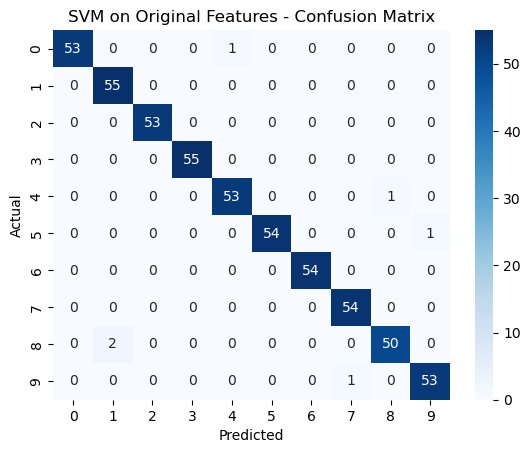


SVM on PCA Features Accuracy: 0.9778


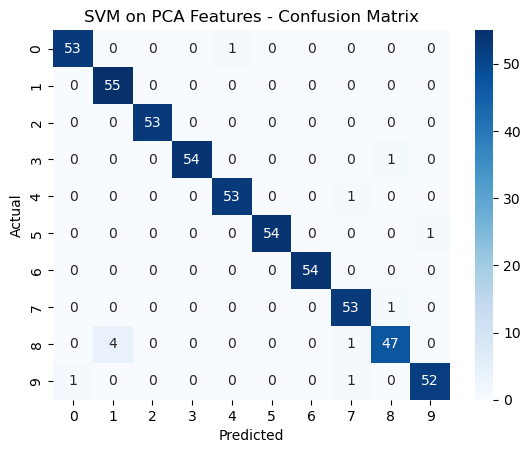


Model Comparison:
             Model  Accuracy
0  SVM (Original)  0.988889
1       SVM (PCA)  0.977778


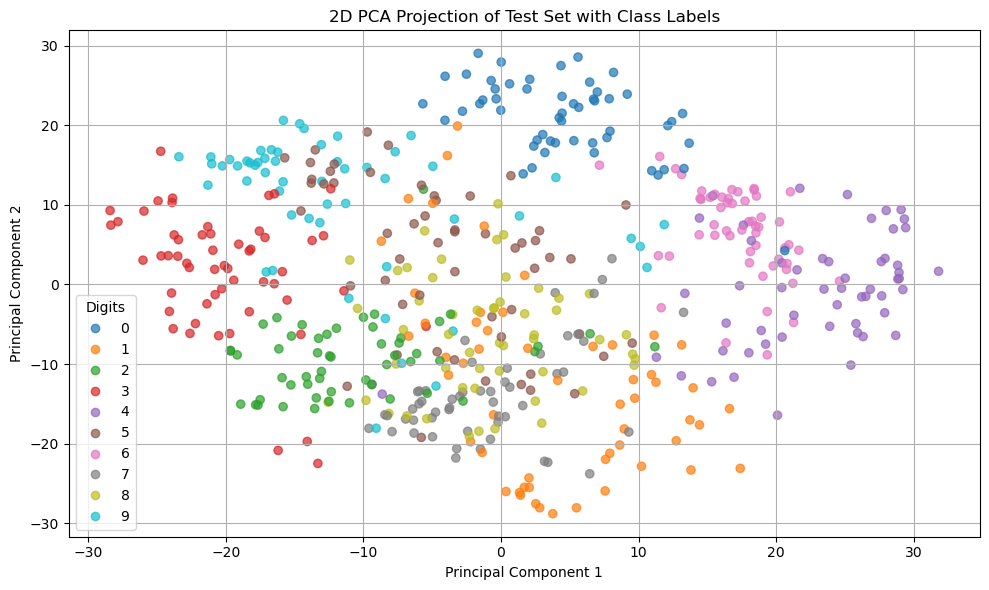


PCA Impact Analysis:

PCA reduced the feature space from 64 to 10, significantly improving model training time while maintaining good accuracy.
However, a slight drop in accuracy was observed after PCA, which is expected due to information loss.
PCA helps in visualizing data, reduces overfitting risk, and speeds up computation, making it a great preprocessing step.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
digits = load_digits()
X = digits.data  
y = digits.target

print(f"Original shape of data: {X.shape}")
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_orig)
X_test_pca = pca.transform(X_test_orig)

print(f"Shape after PCA: {X_train_pca.shape}")

svm_orig = SVC()
svm_orig.fit(X_train_orig, y_train)
y_pred_orig = svm_orig.predict(X_test_orig)
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return acc

acc_orig = evaluate_model(y_test, y_pred_orig, "SVM on Original Features")
acc_pca = evaluate_model(y_test, y_pred_pca, "SVM on PCA Features")

comparison_df = pd.DataFrame({
    'Model': ['SVM (Original)', 'SVM (PCA)'],
    'Accuracy': [acc_orig, acc_pca]
})
print("\nModel Comparison:\n", comparison_df)
pca_2d = PCA(n_components=2)
X_proj = pca_2d.fit_transform(X_test_orig)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("2D PCA Projection of Test Set with Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPCA Impact Analysis:")
print("""
PCA reduced the feature space from 64 to 10, significantly improving model training time while maintaining good accuracy.
However, a slight drop in accuracy was observed after PCA, which is expected due to information loss.
PCA helps in visualizing data, reduces overfitting risk, and speeds up computation, making it a great preprocessing step.
""")
